[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skylercain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes - Book Accuracy: 0.6150700337388815
                 precision    recall  f1-score   support

   1 Chronicles       0.70      0.70      0.70      1350
  1 Corinthians       0.55      0.68      0.61       651
         1 John       0.55      0.69      0.61       140
        1 Peter       0.77      0.52      0.62       138
1 Thessalonians       0.69      0.33      0.45       124
      1 Timothy       0.74      0.53      0.62       152
   2 Chronicles       0.69      0.68      0.69      1193
  2 Corinthians       0.62      0.65      0.63       378
         2 John       1.00      0.11      0.20        18
        2 Peter       0.90      0.42      0.58        85
2 Thessalonians       0.79      0.18      0.29        62
      2 Timothy       0.91      0.39      0.55       110
         3 John       1.00      0.25      0.40        16
           Acts       0.60      0.71      0.65      1373
           Amos       0.65      0.47      0.55       174
     Colossians       0.71      0.29   

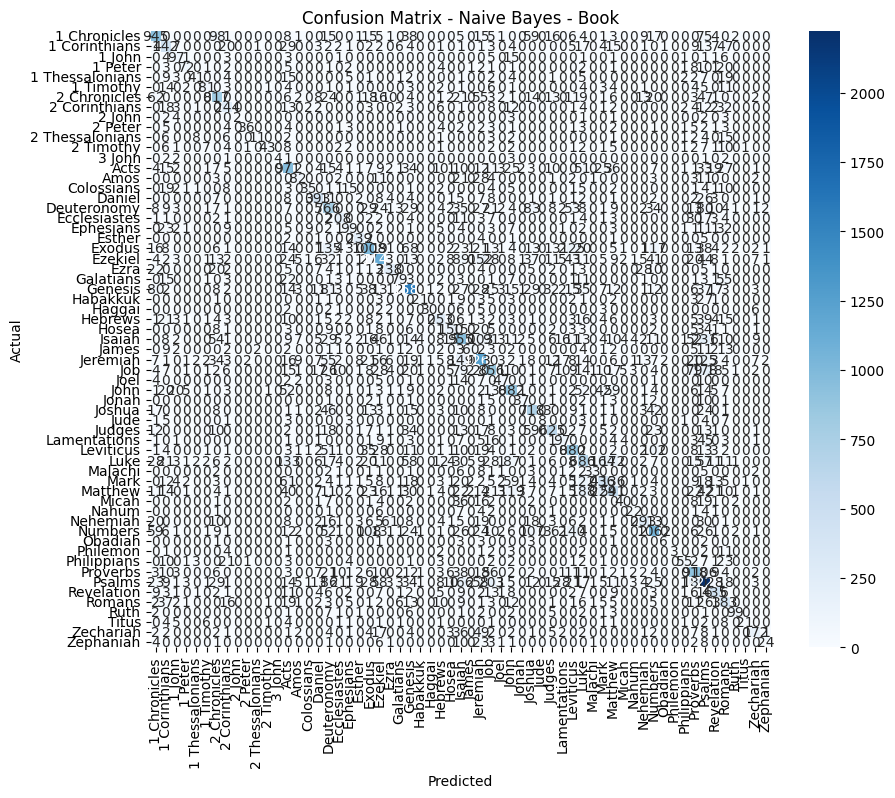

Logistic Regression - Book Accuracy: 0.7383958695429915
                 precision    recall  f1-score   support

   1 Chronicles       0.81      0.80      0.80      1350
  1 Corinthians       0.69      0.70      0.70       651
         1 John       0.80      0.78      0.79       140
        1 Peter       0.80      0.65      0.72       138
1 Thessalonians       0.70      0.60      0.65       124
      1 Timothy       0.83      0.61      0.70       152
   2 Chronicles       0.86      0.80      0.83      1193
  2 Corinthians       0.76      0.69      0.72       378
         2 John       1.00      0.50      0.67        18
        2 Peter       0.90      0.66      0.76        85
2 Thessalonians       0.70      0.50      0.58        62
      2 Timothy       0.84      0.58      0.69       110
         3 John       0.81      0.81      0.81        16
           Acts       0.75      0.75      0.75      1373
           Amos       0.87      0.64      0.74       174
     Colossians       0.68     

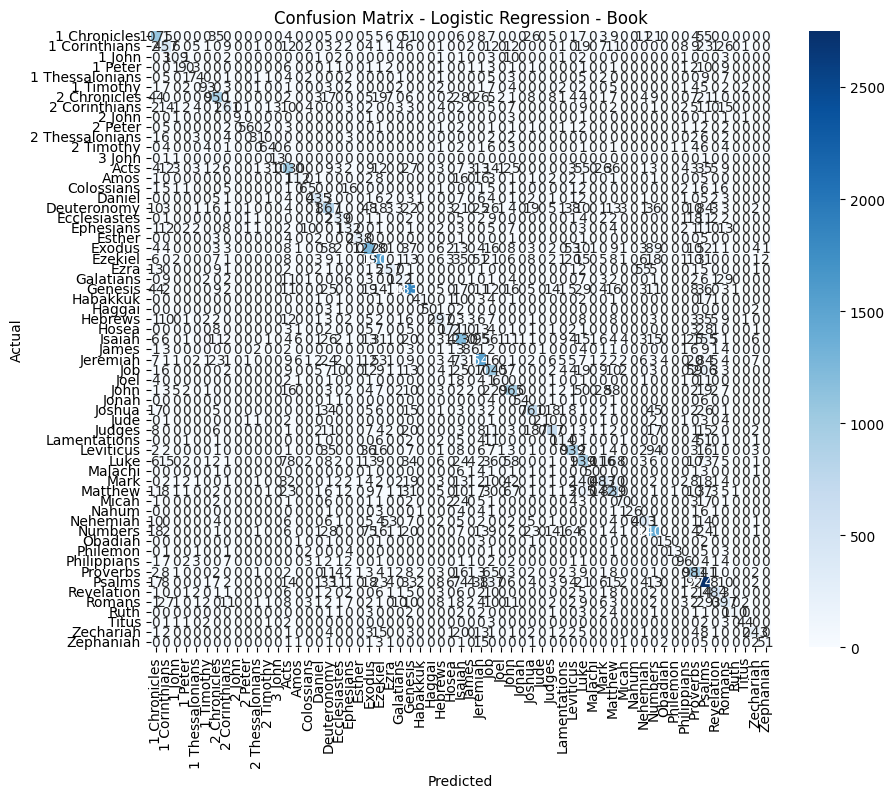

Naive Bayes - Author Accuracy: 0.6462018198548206
                                                                         precision    recall  f1-score   support

                                                              Zechariah       0.71      0.50      0.59       334
                                                                   Amos       0.65      0.47      0.54       174
                                                                 Daniel       0.74      0.78      0.76       498
              David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses       0.56      0.66      0.61      3390
                                                                Ezekiel       0.68      0.64      0.66      1824
                                                                   Ezra       0.72      0.73      0.72      2906
                                                               Habakkuk       0.71      0.26      0.38        84
                                             

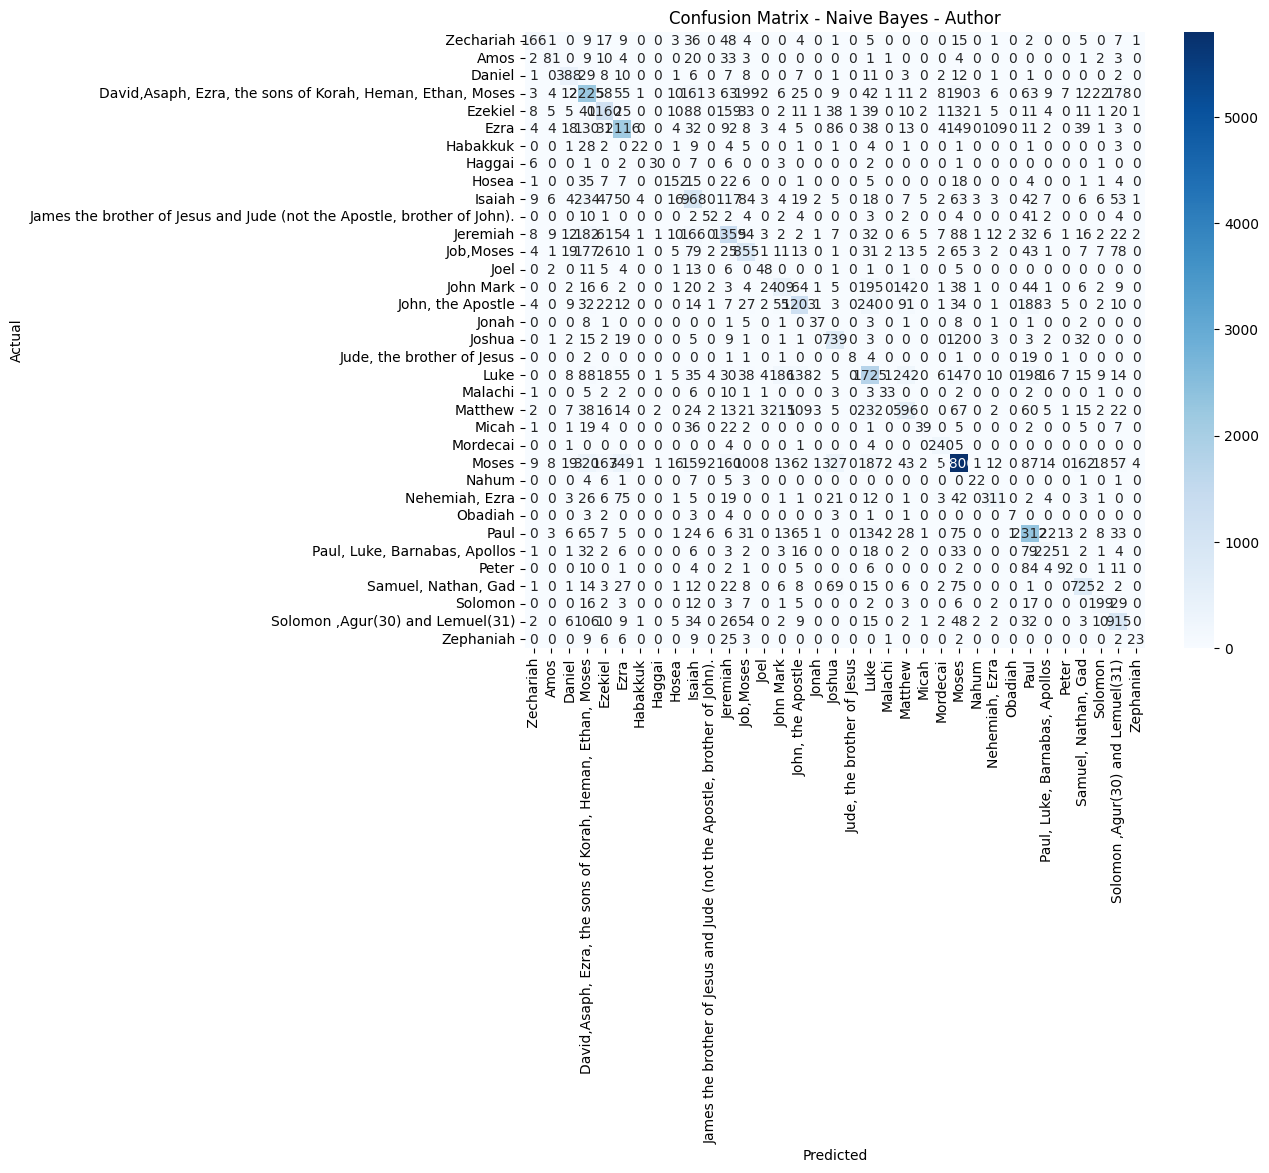

Logistic Regression - Author Accuracy: 0.7589459155505572
                                                                         precision    recall  f1-score   support

                                                              Zechariah       0.89      0.70      0.78       334
                                                                   Amos       0.86      0.67      0.75       174
                                                                 Daniel       0.93      0.87      0.90       498
              David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses       0.67      0.77      0.72      3390
                                                                Ezekiel       0.83      0.81      0.82      1824
                                                                   Ezra       0.84      0.81      0.83      2906
                                                               Habakkuk       0.93      0.49      0.64        84
                                     

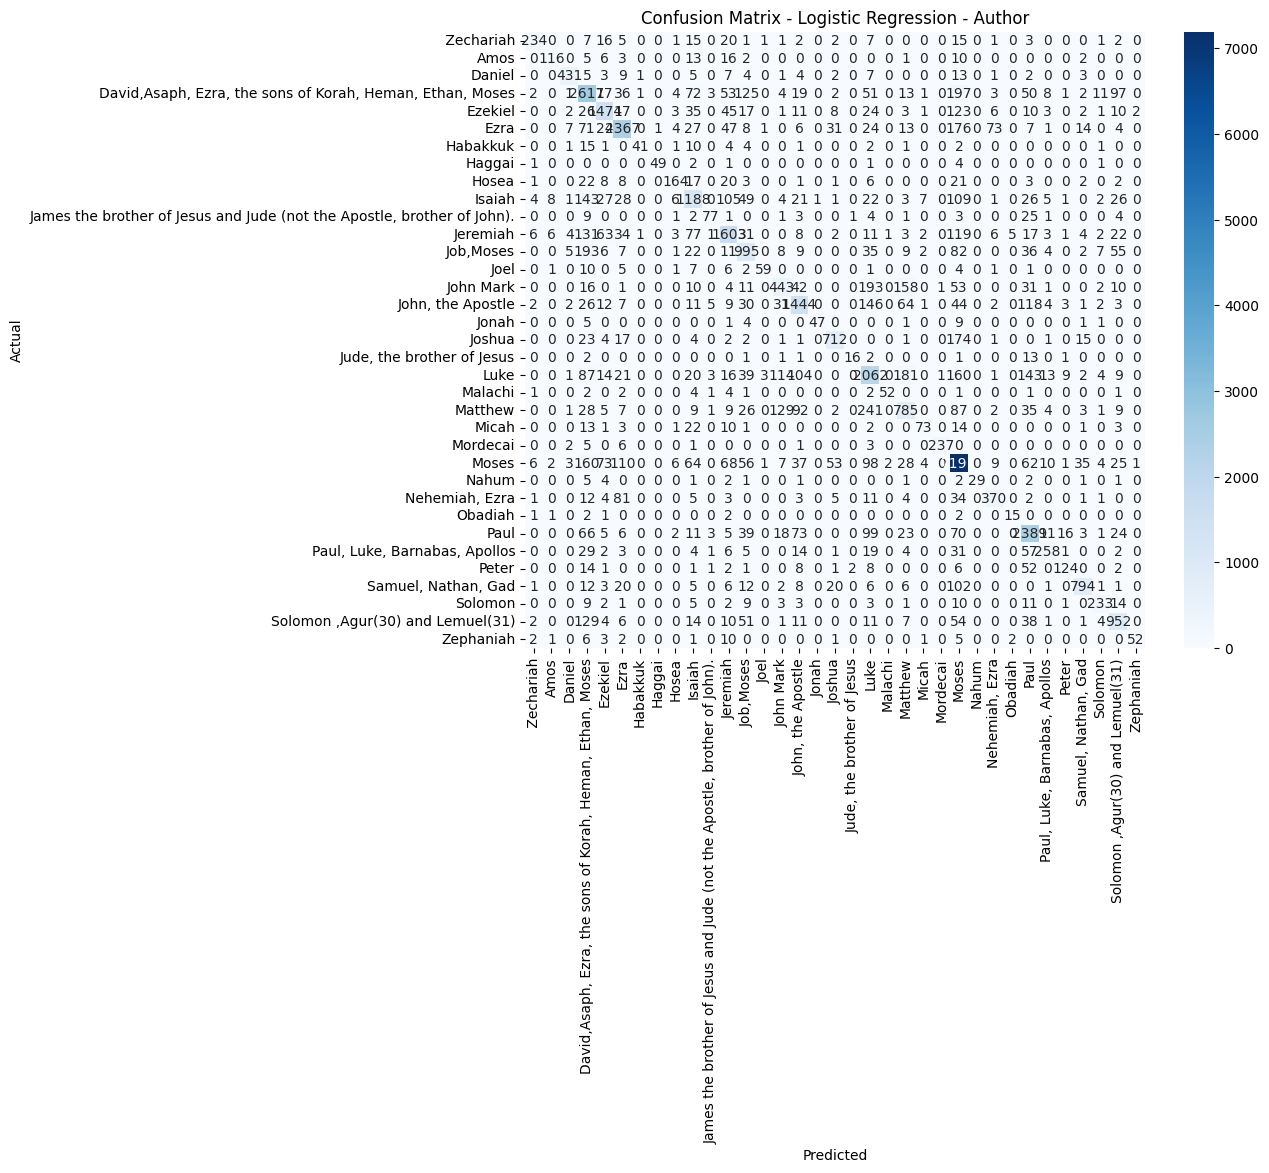

Naive Bayes - Translation Accuracy: 0.5270677844801145
              precision    recall  f1-score   support

         ASV       0.43      0.26      0.33      5631
         BBE       0.85      0.97      0.90      5647
         DBY       0.43      0.28      0.34      5600
         KJV       0.42      0.28      0.33      5485
         WBT       0.37      0.43      0.40      5513
         WEB       0.49      0.79      0.61      5757
         YLT       0.58      0.67      0.62      5491

    accuracy                           0.53     39124
   macro avg       0.51      0.53      0.50     39124
weighted avg       0.51      0.53      0.51     39124


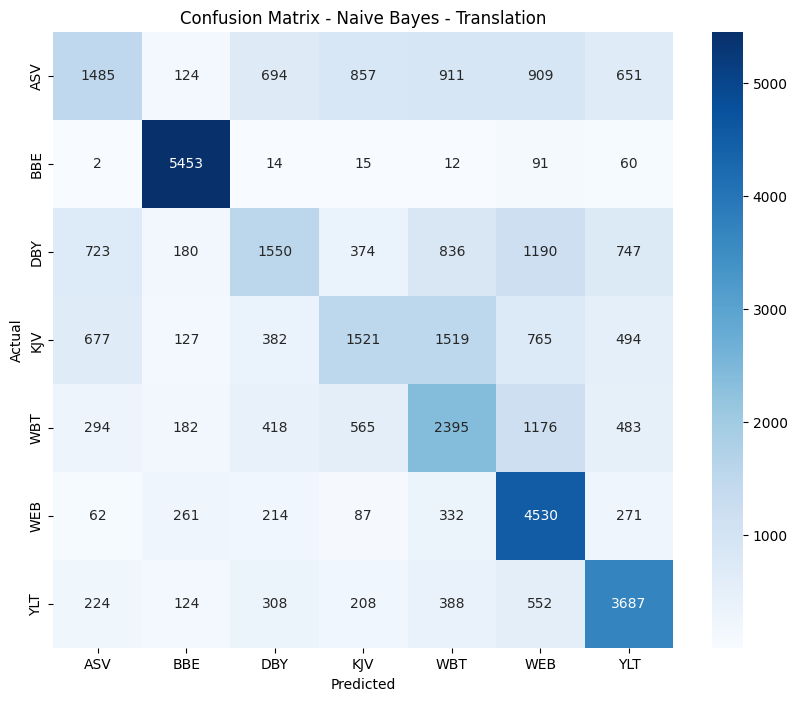

Logistic Regression - Translation Accuracy: 0.5299560372150087
              precision    recall  f1-score   support

         ASV       0.40      0.29      0.33      5631
         BBE       0.84      0.96      0.90      5647
         DBY       0.41      0.33      0.36      5600
         KJV       0.40      0.31      0.35      5485
         WBT       0.38      0.45      0.41      5513
         WEB       0.57      0.70      0.63      5757
         YLT       0.59      0.67      0.63      5491

    accuracy                           0.53     39124
   macro avg       0.51      0.53      0.52     39124
weighted avg       0.51      0.53      0.52     39124


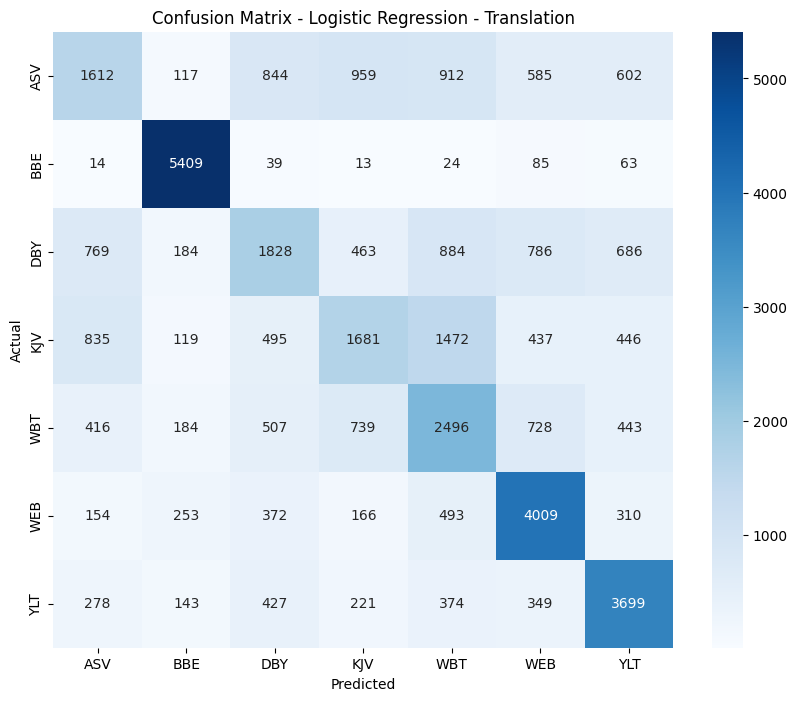

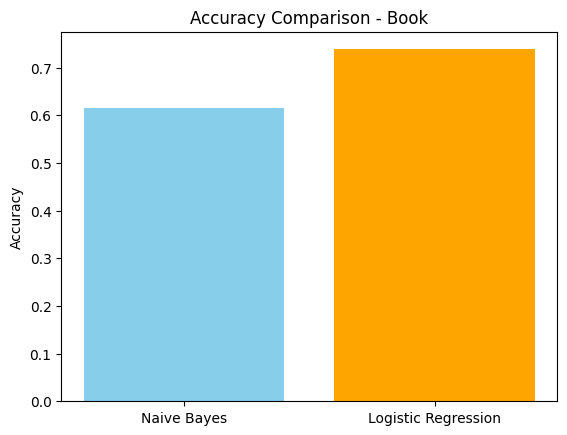

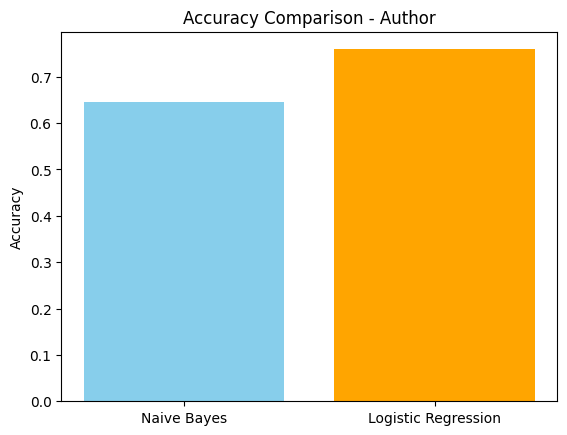

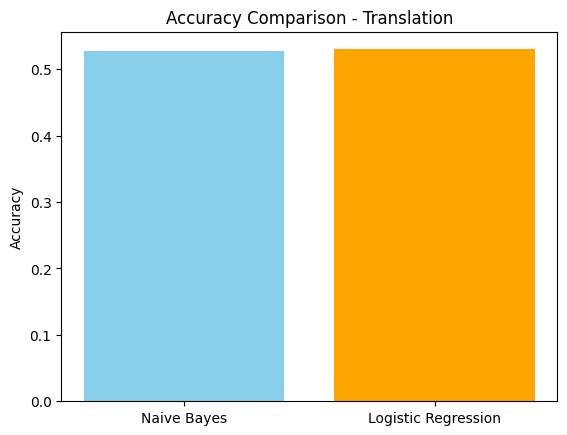

['logistic_regression_translation_v1.pkl']

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Initialize stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Columns for Bible translations
columns = ['verse_id', 'book_id', 'chapter', 'verse', 'text']

# Load key_english for metadata
key_english = pd.read_csv('bible_data/bible_databases-master/bible_databases-master/csv/key_english.csv')
key_english.columns = ['book_id', 'book_name', 'testament', 'genre']

author_list = {
    "Genesis": "Moses",
    "Exodus": "Moses",
    "Leviticus": "Moses",
    "Numbers": "Moses",
    "Deuteronomy": "Moses",
    "Joshua": "Joshua",
    "Judges": "Samuel, Nathan, Gad",
    "Ruth": "Samuel, Nathan, Gad",
    "1 Samuel (1 Kings)": "Samuel, Nathan, Gad",
    "2 Samuel (2 Kings)": "Samuel, Nathan, Gad",
    "1 Kings (3 Kings)": "Jeremiah",
    "2 Kings (4 Kings)": "Jeremiah",
    "1 Chronicles": "Ezra",
    "2 Chronicles": "Ezra",
    "Ezra": "Ezra",
    "Nehemiah": "Nehemiah, Ezra",
    "Esther": "Mordecai",
    "Job": "Job,Moses",
    "Psalms": "David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses",
    "Proverbs": "Solomon ,Agur(30) and Lemuel(31)",
    "Ecclesiastes": "Solomon",
    "Song of Solomon (Canticles)": "Solomon",
    "Isaiah": "Isaiah",
    "Jeremiah": "Jeremiah",
    "Lamentations": "Jeremiah",
    "Ezekiel": "Ezekiel",
    "Daniel": "Daniel",
    "Hosea": "Hosea",
    "Joel": "Joel",
    "Amos": "Amos",
    "Obadiah": "Obadiah",
    "Jonah": "Jonah",
    "Micah": "Micah",
    "Nahum": "Nahum",
    "Habakkuk": "Habakkuk",
    "Zephaniah": "Zephaniah",
    "Haggai": "Haggai",
    "Zechariah": " Zechariah",
    "Malachi": "Malachi",
    "Matthew": "Matthew",
    "Mark": "John Mark",
    "Luke": "Luke",
    "John": "John, the Apostle",
    "Acts": "Luke",
    "Romans": "Paul",
    "1 Corinthians": "Paul",
    "2 Corinthians": "Paul",
    "Galatians": "Paul",
    "Ephesians": "Paul",
    "Philippians": "Paul",
    "Colossians": "Paul",
    "1 Thessalonians": "Paul",
    "2 Thessalonians": "Paul",
    "1 Timothy": "Paul",
    "2 Timothy": "Paul",
    "Titus": "Paul",
    "Philemon": "Paul",
    "Hebrews": "Paul, Luke, Barnabas, Apollos",
    "James": "James the brother of Jesus and Jude (not the Apostle, brother of John).",
    "1 Peter": "Peter",
    "2 Peter": "Peter",
    "1 John": "John, the Apostle",
    "2 John": "John, the Apostle",
    "3 John": "John, the Apostle",
    "Jude": "Jude, the brother of Jesus",
    "Revelation": "John, the Apostle"
}

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to load and preprocess a single translation
def load_translation(file_path, translation_name):
    df = pd.read_csv(file_path)
    df.columns = columns
    df['translation'] = translation_name  # Add a column for the translation name
    df['cleaned_text'] = df['text'].apply(preprocess_text)  # Clean text
    return df

# Load all translations
translations = ['t_kjv.csv', 't_asv.csv', 't_bbe.csv', 't_dby.csv', 't_wbt.csv', 't_web.csv', 't_ylt.csv']
translation_names = ['KJV', 'ASV', 'BBE', 'DBY', 'WBT', 'WEB', 'YLT']

# Merge all translations
all_translations = pd.DataFrame()
for file, name in zip(translations, translation_names):
    file_path = f'bible_data/bible_databases-master/bible_databases-master/csv/{file}'
    translation_df = load_translation(file_path, name)
    all_translations = pd.concat([all_translations, translation_df], ignore_index=True)

# Merge with book metadata
all_translations = all_translations.merge(key_english, on='book_id', how='left')

# Add an author column to the dataset
all_translations['author'] = all_translations['book_name'].map(author_list)

# Drop rows with missing author information (if any)
all_translations = all_translations.dropna(subset=['author'])

# Extract features and labels
texts = all_translations['cleaned_text']
labels_book = all_translations['book_name']
labels_author = all_translations['author']
labels_translation = all_translations['translation']

# Encode labels
label_encoder_book = LabelEncoder()
label_encoder_author = LabelEncoder()
label_encoder_translation = LabelEncoder()

labels_encoded_book = label_encoder_book.fit_transform(labels_book)
labels_encoded_author = label_encoder_author.fit_transform(labels_author)
labels_encoded_translation = label_encoder_translation.fit_transform(labels_translation)

# Split into training and test sets
x_train, x_test, y_train_book, y_test_book = train_test_split(texts, labels_encoded_book, test_size=0.2, random_state=42)
_, _, y_train_author, y_test_author = train_test_split(texts, labels_encoded_author, test_size=0.2, random_state=42)
_, _, y_train_translation, y_test_translation = train_test_split(texts, labels_encoded_translation, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = CountVectorizer(max_features=5000)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train Naive Bayes for books
nb_model_book = MultinomialNB()
nb_model_book.fit(x_train_vectorized, y_train_book)
y_pred_book_nb = nb_model_book.predict(x_test_vectorized)

# Train Logistic Regression for books
logistic_model_book = LogisticRegression(max_iter=1000)
logistic_model_book.fit(x_train_vectorized, y_train_book)
y_pred_book_logistic = logistic_model_book.predict(x_test_vectorized)

# Repeat for authors
nb_model_author = MultinomialNB()
nb_model_author.fit(x_train_vectorized, y_train_author)
y_pred_author_nb = nb_model_author.predict(x_test_vectorized)

logistic_model_author = LogisticRegression(max_iter=1000)
logistic_model_author.fit(x_train_vectorized, y_train_author)
y_pred_author_logistic = logistic_model_author.predict(x_test_vectorized)

# Repeat for translations
nb_model_translation = MultinomialNB()
nb_model_translation.fit(x_train_vectorized, y_train_translation)
y_pred_translation_nb = nb_model_translation.predict(x_test_vectorized)

logistic_model_translation = LogisticRegression(max_iter=1000)
logistic_model_translation.fit(x_train_vectorized, y_train_translation)
y_pred_translation_logistic = logistic_model_translation.predict(x_test_vectorized)

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Save label encoders
joblib.dump(label_encoder_book, 'label_encoder_book.pkl')
joblib.dump(label_encoder_author, 'label_encoder_author.pkl')
joblib.dump(label_encoder_translation, 'label_encoder_translation.pkl')

# Save Naive Bayes models
joblib.dump(nb_model_book, 'naive_bayes_book_v1.pkl')
joblib.dump(nb_model_author, 'naive_bayes_author_v1.pkl')
joblib.dump(nb_model_translation, 'naive_bayes_translation_v1.pkl')

# Save Logistic Regression models
joblib.dump(logistic_model_book, 'logistic_regression_book_v1.pkl')
joblib.dump(logistic_model_author, 'logistic_regression_author_v1.pkl')
joblib.dump(logistic_model_translation, 'logistic_regression_translation_v1.pkl')


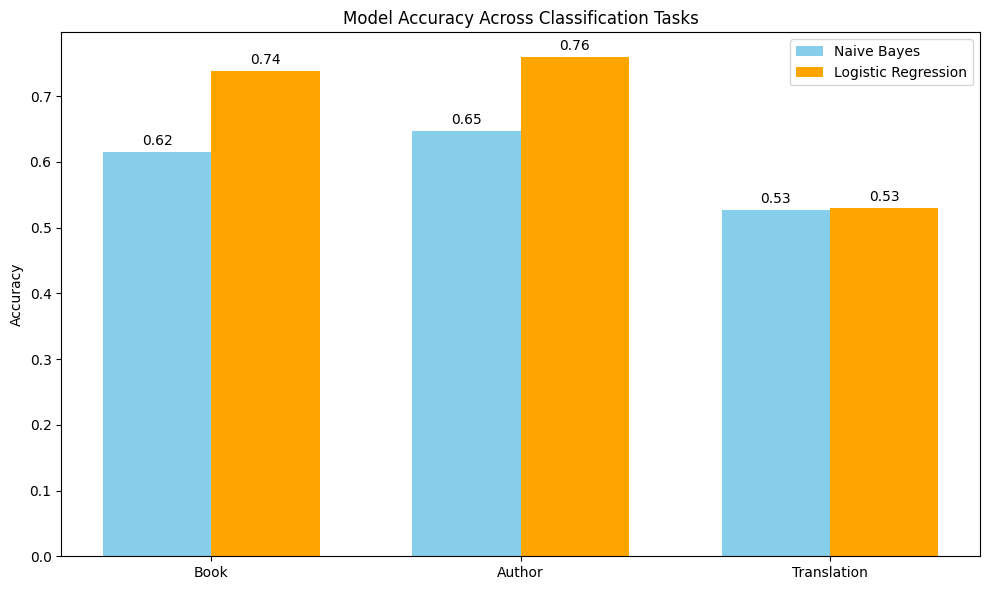

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracies
tasks = ['Book', 'Author', 'Translation']
models = ['Naive Bayes', 'Logistic Regression']
accuracy_nb = [accuracy_score(y_test_book, y_pred_book_nb),
               accuracy_score(y_test_author, y_pred_author_nb),
               accuracy_score(y_test_translation, y_pred_translation_nb)]
accuracy_lr = [accuracy_score(y_test_book, y_pred_book_logistic),
               accuracy_score(y_test_author, y_pred_author_logistic),
               accuracy_score(y_test_translation, y_pred_translation_logistic)]

x = np.arange(len(tasks))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars_nb = ax.bar(x - width/2, accuracy_nb, width, label='Naive Bayes', color='skyblue')
bars_lr = ax.bar(x + width/2, accuracy_lr, width, label='Logistic Regression', color='orange')

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Across Classification Tasks')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()

# Annotate bars with accuracy values
for bars in [bars_nb, bars_lr]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

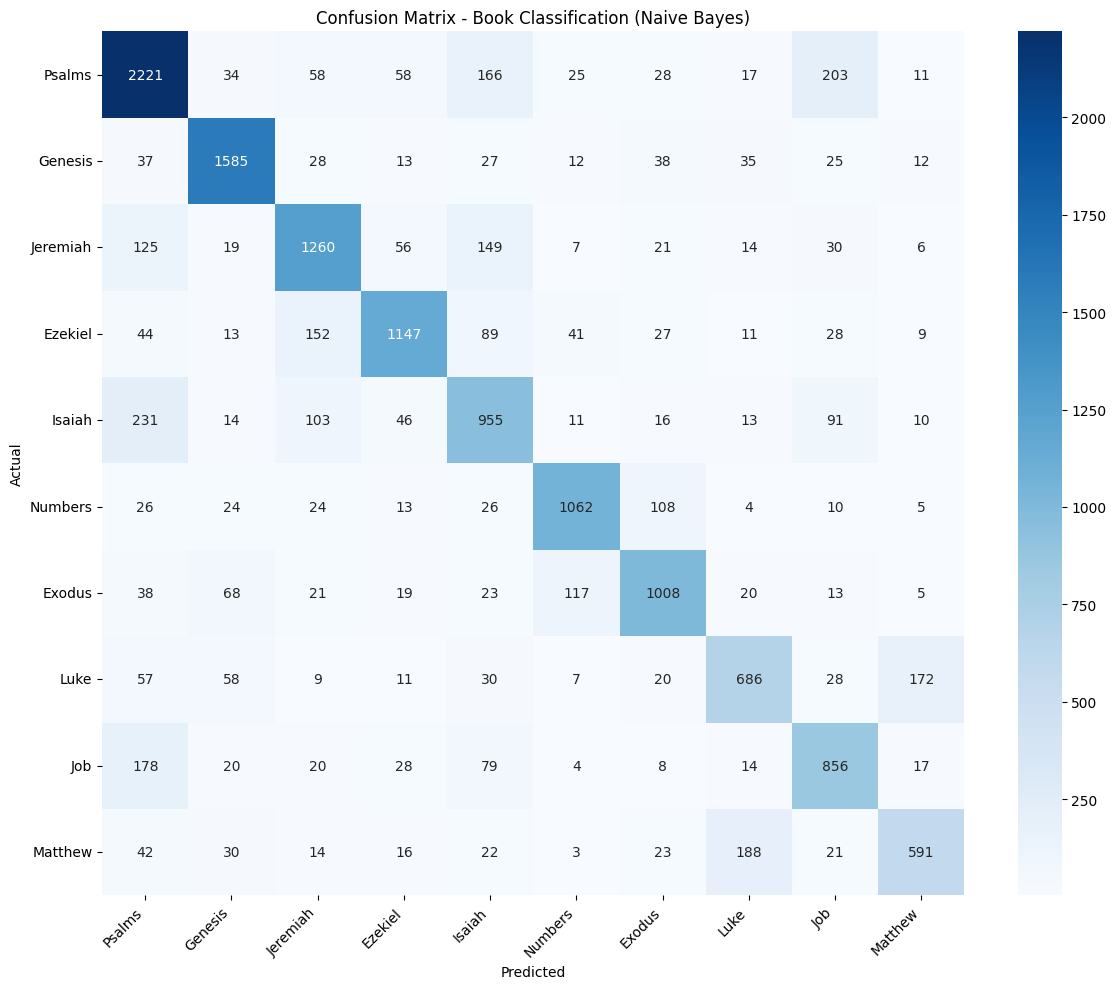

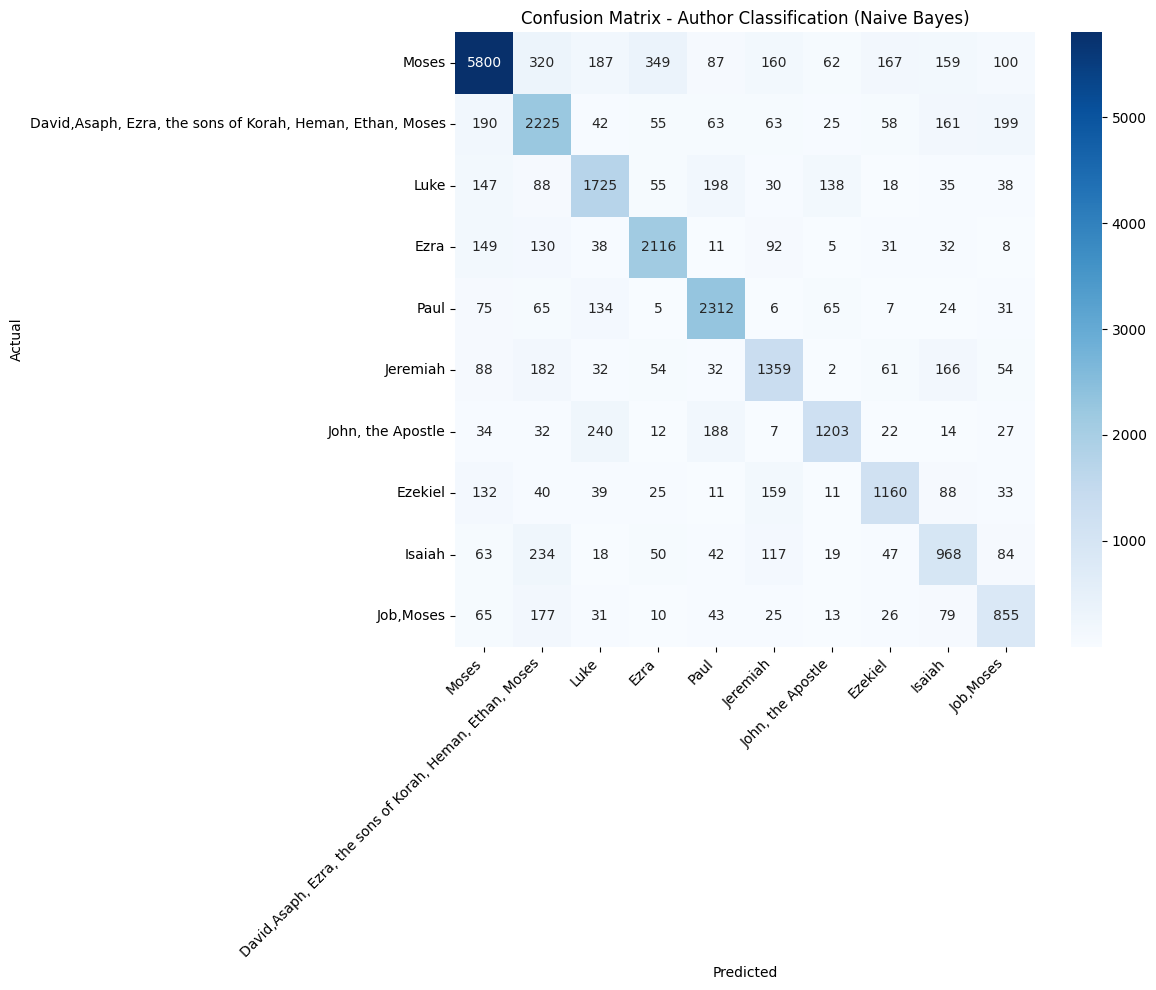

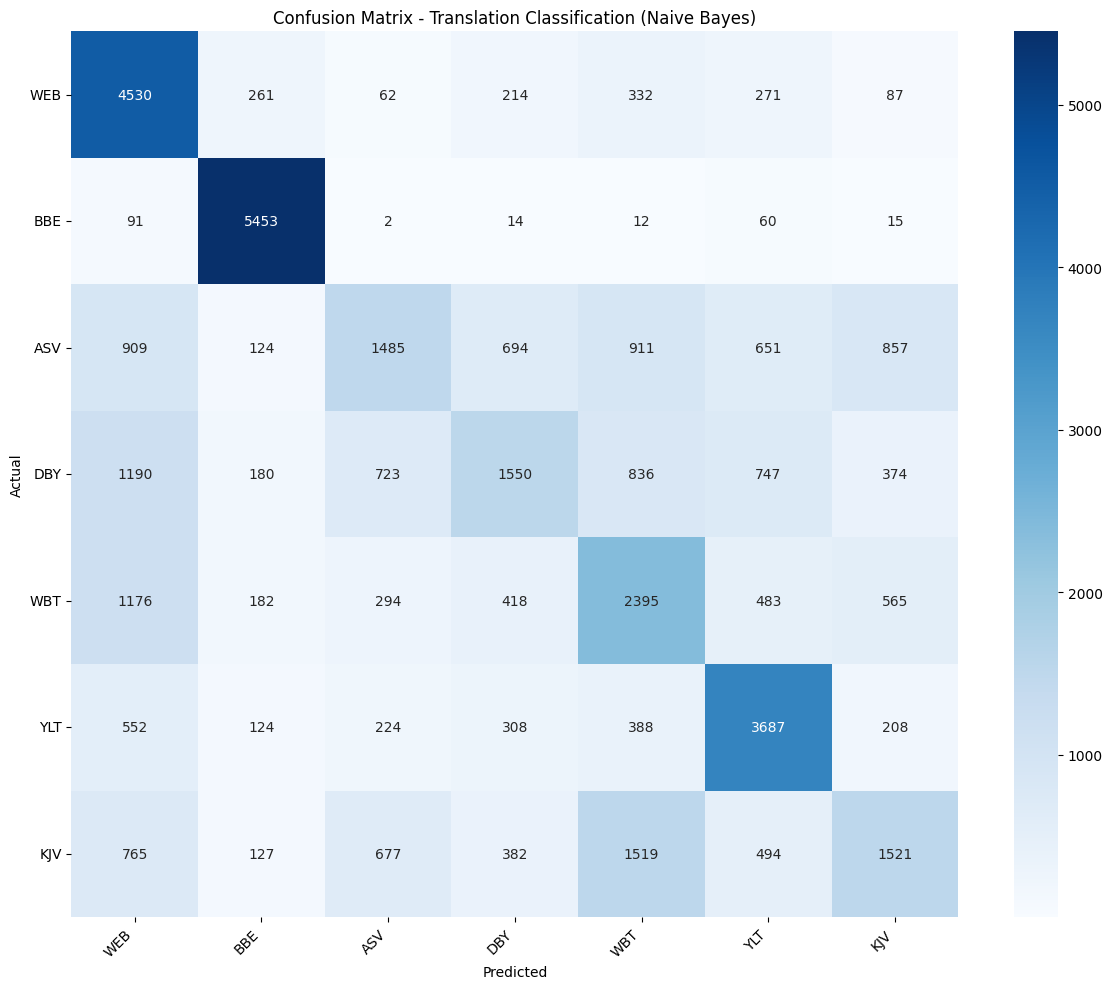

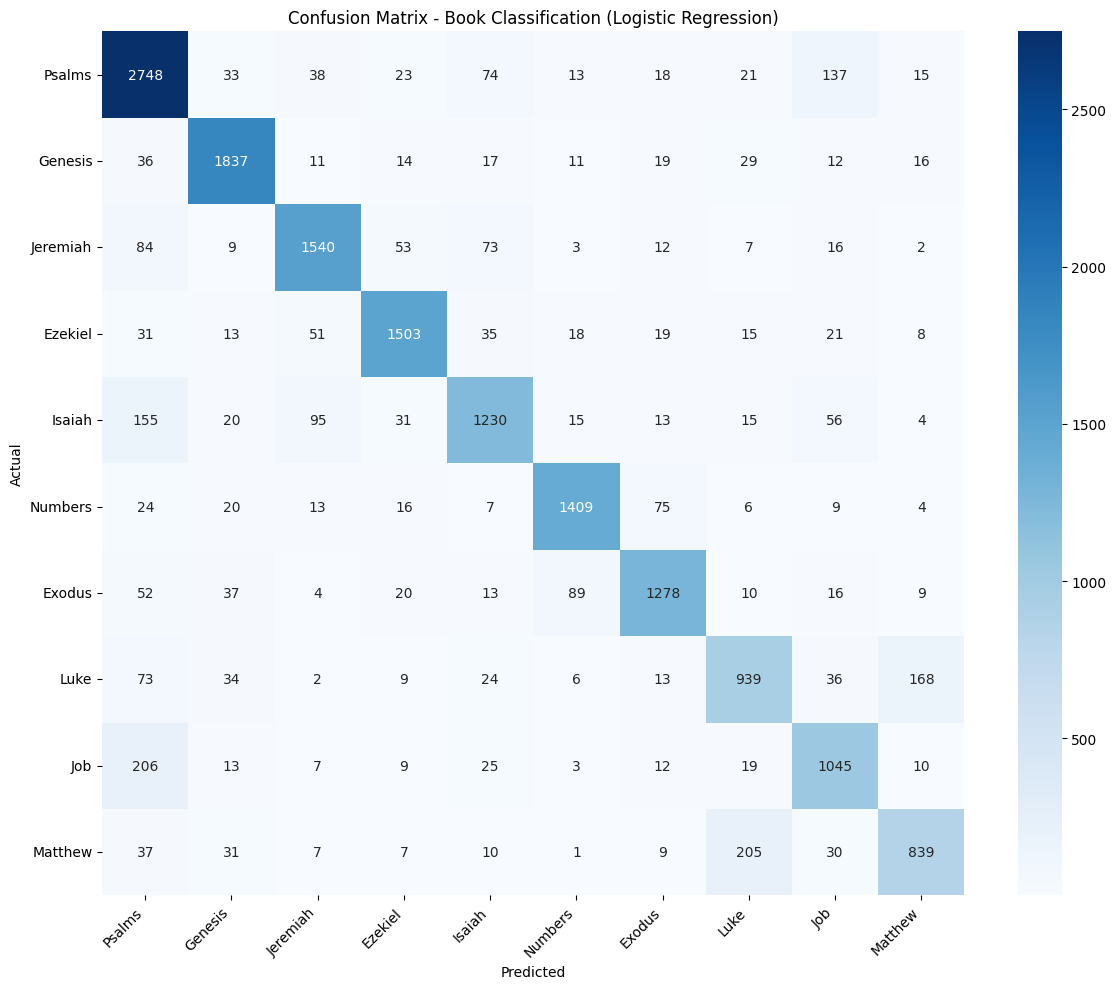

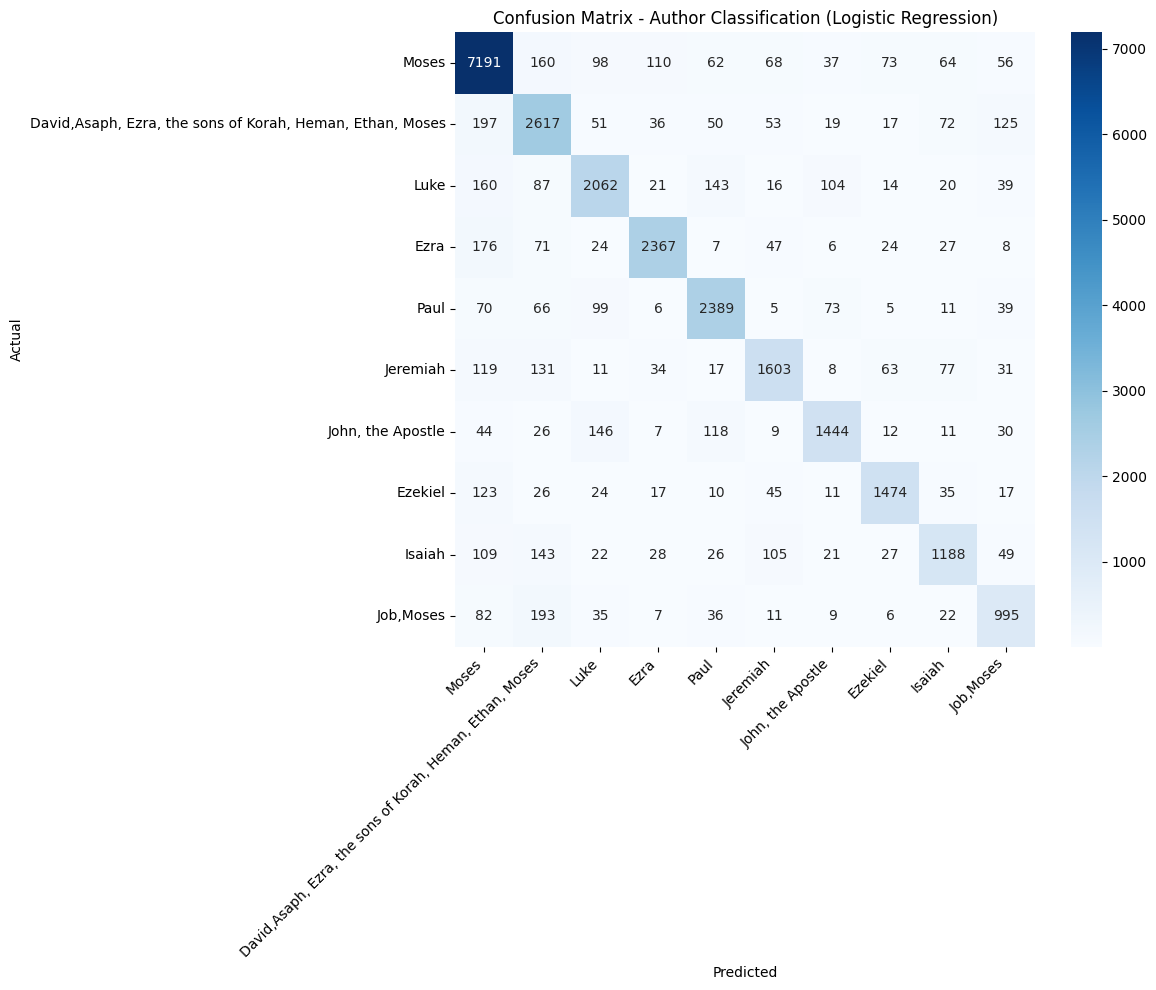

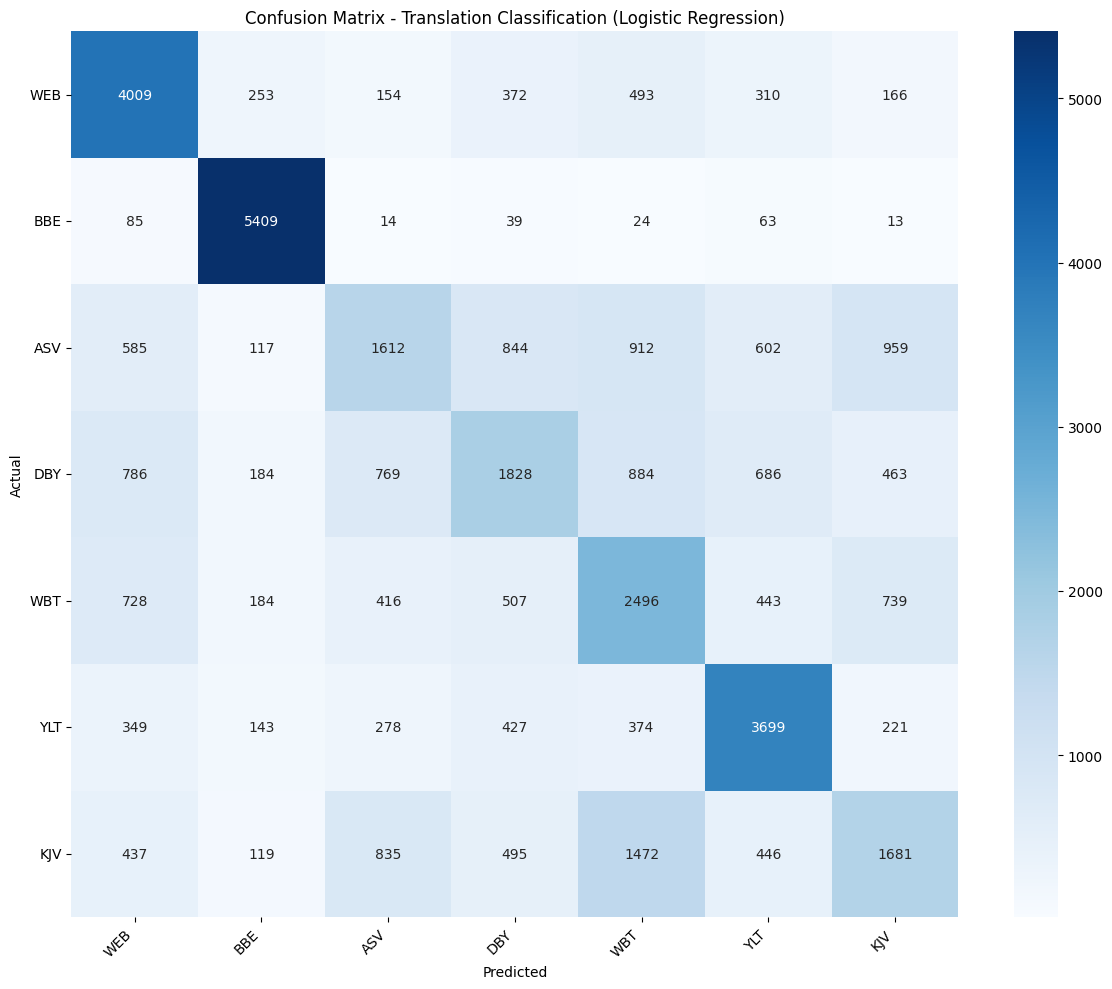

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot confusion matrices
def plot_confusion_matrix(y_test, y_pred, classes, title, model_name, top_n=None):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # If top_n is specified, reduce classes
    if top_n:
        cm_df = pd.DataFrame(cm, index=classes, columns=classes)
        top_classes = cm_df.sum(axis=1).sort_values(ascending=False).head(top_n).index
        cm_df = cm_df.loc[top_classes, top_classes]
        cm = cm_df.values
        classes = top_classes

    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix - {title} ({model_name})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for Naive Bayes
plot_confusion_matrix(y_test_book, y_pred_book_nb, label_encoder_book.classes_, "Book Classification", "Naive Bayes", top_n=10)
plot_confusion_matrix(y_test_author, y_pred_author_nb, label_encoder_author.classes_, "Author Classification", "Naive Bayes", top_n=10)
plot_confusion_matrix(y_test_translation, y_pred_translation_nb, label_encoder_translation.classes_, "Translation Classification", "Naive Bayes", top_n=10)

# Plot confusion matrices for Logistic Regression
plot_confusion_matrix(y_test_book, y_pred_book_logistic, label_encoder_book.classes_, "Book Classification", "Logistic Regression", top_n=10)
plot_confusion_matrix(y_test_author, y_pred_author_logistic, label_encoder_author.classes_, "Author Classification", "Logistic Regression", top_n=10)
plot_confusion_matrix(y_test_translation, y_pred_translation_logistic, label_encoder_translation.classes_, "Translation Classification", "Logistic Regression", top_n=10)
